# Probabilidade e estatística
## Exercício 3 - Esqueleto 💀

## ⚔️ O Grande Torneio ⚔️

Um grande empresário chamado Kido adotou 100 orfãos e os enviou a grandes mestres ao redor do mundo para que treinassem e se especializassem em uma classe. Após voltarem, mais poderosos, Kido decide fazer um torneio, com o objetivo de eleger o mais forte como guardião de Saori, sua filha.
Porém, após a invasão de Azeirf quase todas as arenas foram destruídas, com só uma disponível. Foi instituído então que ocorreriam 99 batalhas consecutivas 1x1 em que o vencedor se mantém na arena. 
Como os combatentes ainda não tinham experiência, seus grandes potenciais estavam latentes, assim, evoluem rapidamente a cada batalha. Assim, não terão tempo para se recuperarem completamente

A associação, vendo isso, decide realizar uma simulação computacional para analisar o torneio. Eles planejam ver se determinada posição parece possuir maior vantagem, se existe classe com maior vantagem e se existe relação entre a chance de ganhar, a posição e a classe.

In [239]:
from numpy.random import choice
import random

In [257]:
#Especificações de cada classe:
classes = {
'Assasino': {'HP': 70, 'ATK': 60, 'MAG': 20, 'DEF': 30, 'RES': 30, 'SPD': 70, 'ACC': 65, 'EVA': 55, 'CRIT': 0.25},
'Guerreiro': {'HP': 100, 'ATK': 65, 'MAG': 20, 'DEF': 55, 'RES': 40, 'SPD': 50, 'ACC': 60, 'EVA': 35, 'CRIT': 0.10},
'Escudeiro': {'HP': 120, 'ATK': 50, 'MAG': 15, 'DEF': 75, 'RES': 55, 'SPD': 35, 'ACC': 55, 'EVA': 30, 'CRIT': 0.05},
'Mago': {'HP': 80, 'ATK': 25, 'MAG': 75, 'DEF': 35, 'RES': 60, 'SPD': 45, 'ACC': 65, 'EVA': 40, 'CRIT': 0.15},
'Paladino': {'HP': 110, 'ATK': 55, 'MAG': 45, 'DEF': 65, 'RES': 65, 'SPD': 40, 'ACC': 55, 'EVA': 35, 'CRIT': 0.08}
}

In [264]:
def participantes():
    #Escolha da classe de cada player
    classes = ['Assasino', 'Paladino', 'Guerreiro', 'Mago', 'Escudeiro']
    return choice(classes, 100)
    
def turno1(player1, player2, nivel):
    #Sorteio com base na speed dos players de quem começa
    spd1 = classes[player1]['SPD'] * (1+0.04*nivel)
    spd2 = classes[player1]['SPD']
    prob = spd1 / (spd1+spd2)
    return random.choices([True, False], [prob, 1-prob])[0]

def acerto(player1, player2, nivel):
    #Calculo da probabilidade de acerto de cada player
    acerto1 = 0.5 + 0.005*(classes[player1]['ACC'] * (1+0.04*nivel) - classes[player2]['EVA'])
    acerto2 = 0.5 + 0.005*(classes[player2]['ACC'] - classes[player1]['EVA'] * (1+0.04*nivel))
    return acerto1, acerto2

def critico(crit):
    #Sorteio se o ataque deu crítico com base no CRIT
    return random.choices([1.5, 1], [crit, 1-crit])[0]

def acertou(prob):
    #Sorteio com base na acuracia e evasão para se o ataque acertou ou não
    return random.choices([True, False], [prob, 1-prob])[0]

def assasino_2turnos(sp1, sp2):
    #O assasino tem a habilidade especial de ter uma chance de realizar 2 ataques consecutivos
    prob = (sp1-sp2)/100
    return random.choices([2, 1], [prob, 1-prob])[0]

def dano(player, atk, mag, defe, res, crit, sp1, sp2):
    #Cálculo do dano de um ataque
    if player == "Mago": #Magos usam magia e a resistencia mágica do oponente atrapalha a eficacia
        dmg = mag*(critico(crit)) - res * 0.6
    elif player == 'Assasino':
        dmg = (atk*(critico(crit)) - defe * 0.6) * assasino_2turnos(sp1,sp2)
    else:
        dmg = atk*(critico(crit)) - defe * 0.6 
    return dmg

In [259]:
def torneio():
    players = participantes()
    vencedor, nivel = 0, 0
    vida = classes[players[vencedor]]['HP']
    
    for i in range(1,100): #Serão 99 batalhas
        #Atualizando os atributos a cada batalha
        turno = turno1(players[vencedor], players[i], nivel)
        acerto1, acerto2 = acerto(players[vencedor], players[i], nivel)
        hp1, hp2 = vida + 0.25*(classes[players[vencedor]]['HP'] * (1+ 0.04*nivel)), classes[players[i]]['HP']
        atk1, atk2 = (classes[players[vencedor]]['ATK'] * (1+ 0.04*nivel)), classes[players[i]]['ATK']
        mag1, mag2 = (classes[players[vencedor]]['MAG'] * (1+ 0.04*nivel)), classes[players[i]]['MAG']
        def1, def2 = (classes[players[vencedor]]['DEF'] * (1+ 0.04*nivel)), classes[players[i]]['DEF']
        res1, res2 = (classes[players[vencedor]]['RES'] * (1+ 0.04*nivel)), classes[players[i]]['RES']
        crit1, crit2 = (classes[players[vencedor]]['CRIT'] * (1+ 0.04*nivel)), classes[players[i]]['CRIT']
        sp1, sp2 = (classes[players[vencedor]]['SPD'] * (1+ 0.04*nivel)), classes[players[i]]['SPD']
        
        while hp1 > 0 and hp2 > 0: #Enquanto alguém não tiver o HP zerado, a batalha continua
            if turno:
                if acertou(acerto1):
                    hp2 -= dano(players[vencedor], atk1, mag1, def2, res2, crit1, sp1, sp2)
            else:
                if acertou(acerto2):
                    hp1 -= dano(players[i], atk2, mag2, def1, res1, crit2, sp2, sp1)
                        
            turno = not turno #troca o turno
        #Atualiza o vencedor:
        if hp2 <= 0:
            nivel += 1
            vida = hp1
        else:
            vencedor = i
            nivel = 1
            vida = hp2
    return vencedor, nivel, players[vencedor]

Feita a simulação, devido à grande quantidade de combinações de resultado (500), foi determinado que deveriam ser rodados 10000 torneios.

In [260]:
posição_vencedora, nivel_vencedor, classe_vencedora = [], [], []
for i in range(10000): #Serão rodadas 10000 torneios.
    vencedor, nivel, classe = torneio()
    posição_vencedora.append(vencedor)
    nivel_vencedor.append(nivel)
    classe_vencedora.append(str(classe))

Feitas as 10000 simulações, a Associação percebe que os dados são muito numerosos, difíceis de extrair informação. Assim, os estatísticos são solicitados para fazer gráficos dos resultados

In [231]:
import matplotlib.pyplot as plt

Primeiramente, foi feito um histograma para analisar se alguma das posições iniciais tiveram maior vantagem no torneio

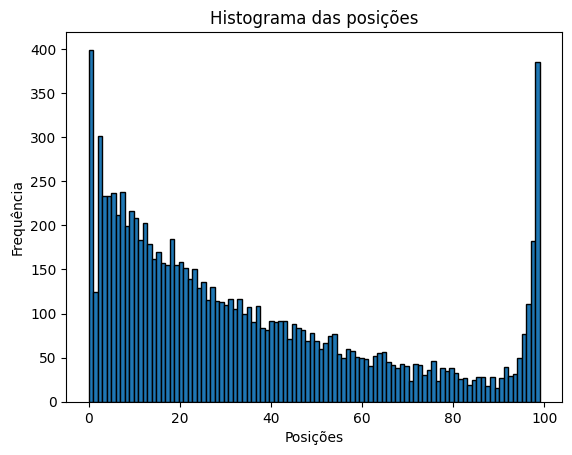

In [261]:
plt.hist(posição_vencedora, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições")
plt.show()

É perceptível que o primeiro combatente e o último possuem grande vantagem em comparação aos outros. Isso faz sentido, pois os primeiros tem potencial de atingirem níveis muito maiores, ficando quase invencíveis. Por outro lado, os últimos terão de ganhar pouquíssimas batalhas para vencer o torneio.

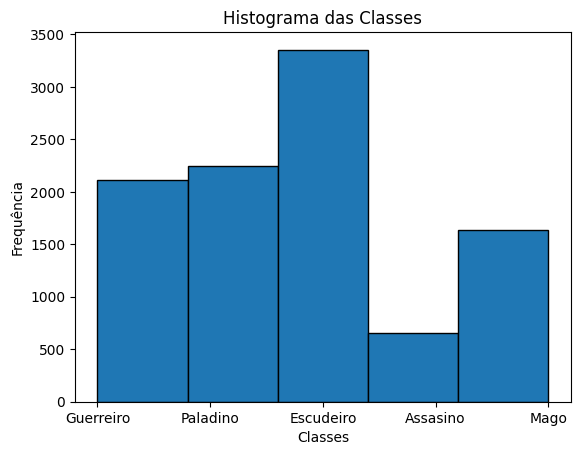

In [263]:
plt.hist(classe_vencedora, bins=5, edgecolor="black")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma das Classes")
plt.show()

No histograma de classes, é perceptível que os escudeiros eram os mais preparados para o torneio, conseguindo significativas mais vitórias.

Analisaremos agora a relação entre posição e classe:

In [268]:
gue, pal, esc, ass, mag = [], [], [], [], []
for i in range(10000):
    if classe_vencedora[i] == 'Paladino':
        pal.append(posição_vencedora[i])
    elif classe_vencedora[i] == 'Guerreiro':
        gue.append(posição_vencedora[i])
    elif classe_vencedora[i] == 'Escudeiro':
        esc.append(posição_vencedora[i])
    elif classe_vencedora[i] == 'Assasino':
        ass.append(posição_vencedora[i])
    else:
        mag.append(posição_vencedora[i])

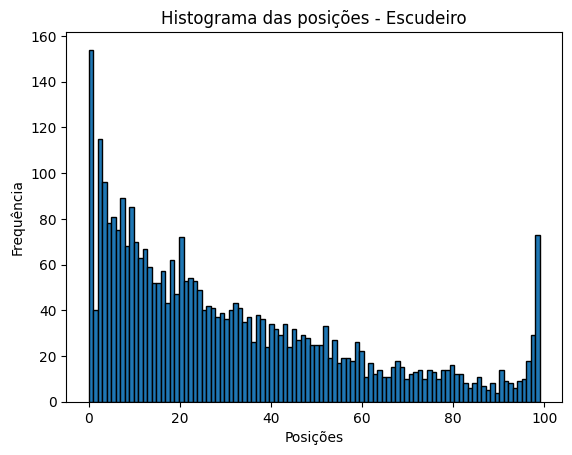

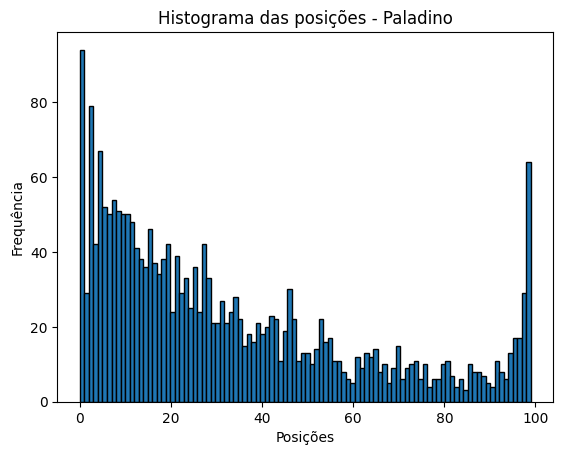

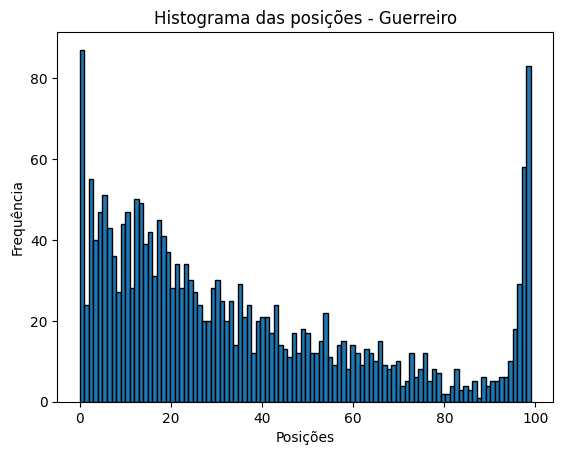

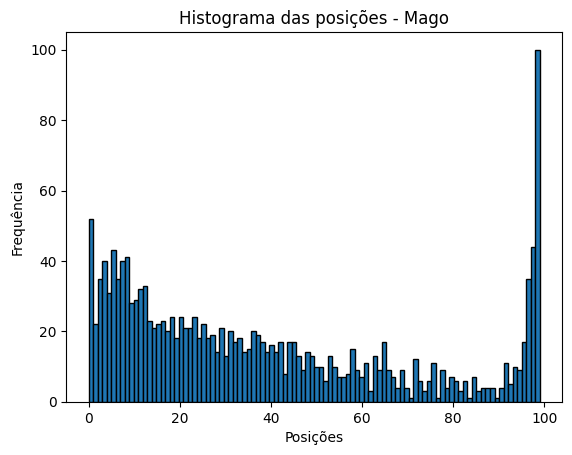

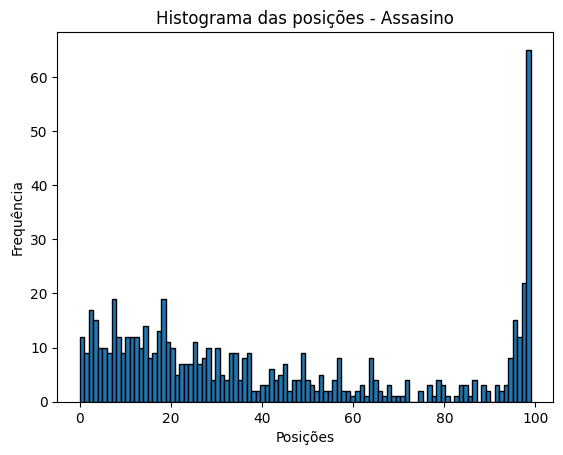

In [272]:
plt.hist(esc, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições - Escudeiro")
plt.show()
plt.hist(pal, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições - Paladino")
plt.show()
plt.hist(gue, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições - Guerreiro")
plt.show()
plt.hist(mag, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições - Mago")
plt.show()
plt.hist(ass, bins=100, edgecolor="black")
plt.xlabel("Posições")
plt.ylabel("Frequência")
plt.title("Histograma das posições - Assasino")
plt.show()

Foi perceptível que os guerreiros e paladinos tiveram mais sucesso ou começando ou sendo os últimos, distribuição parecida com o gráfico geral já analisado. Porém, os magos e assasinos possuem clara vantagem sendo os últimos. Talvez isso seja devido a serem as classes com menos vida, assim não conseguindo recuperar muito após cada batalha, ficando mais frágeis. Já os escudeiros, apresentam vantagem maior começando, essa classe tem foco em defesa e vida, então podem conservar mais vida até ficarem níveis acima para ficarem invencíveis.

Desse modo, o diretor da Associação, vendo esses dados, aposta no mercado negro que o escudeiro Shiryu ganhará.

### Referências utilizadas:
https://chatgpt.com/share/68a46cbb-3a0c-8011-8a6a-201f5ccf50fe
O chat foi usado para balanceamento das classes e ideias de como decidir cada luta com base no atributo.